# Title: Forecasting Model for Kalbe.ipynb

### Maaf ada masalah personal.. Baru mulai buat pagi ini.. Akan tetap saya kumpul dan kerjakan.. Tidak apa2 jika tidak dinilai..

# Intro

Name: Wenny Chandra Sari

Graduate of: Full Stack Data Science Hacktiv8 Batch 16 on December 23th, 2022.

About me:

Hi! ✨✨

My name is Wenny Chandra Sari. I'm a graduated Full Stack Data Scientist from Hacktiv8 Bootcamp. I learnt Big Data, Data Analytics, Machine Learning, Artificial Intelligence, and Data Engineering in the bootcamp using Python, Numpy, Pandas, Matplotlib, Streamlit, Scikit-learn, Keras, Tensorflow, SQL, Pyspark, Docker, Looker data studio, Visual Studio Code, and Google Collab. You can read my project through links in my CV.

I also have experiences in business and legal field that shape my flexibility, courage, and sharpness. Besides, I had joined a public speaking and leadership club since 2016 and served as a secretary there for a year that improve my speaking and collaboration capabilities.

Other characters that I have are optimistic, quick learner, eager to learn new things, hard worker, refuse stagnation, and share skills.

Thank you for your time ✨✨

# External Link

Deployment/Tableau/Data Studio/Streamlit any other link:

PPT(15 slides):

Elevator Pitch:

# Working Area

## 1. Import Lib

In [1]:
# python lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# setup syntax
pd.set_option('display.max_columns', None)

## 2. Data Loading

Data berupa berformat xlsx atau excel yang telah diberikan sebelumnya dan didownload oleh siswa.

In [4]:
# load dataset
data_A1 = pd.read_excel('kalbe_data.xlsx', sheet_name="A1")
data_A2 = pd.read_excel('kalbe_data.xlsx', sheet_name="A2")
data_B1 = pd.read_excel('kalbe_data.xlsx', sheet_name="B1")
data_B2 = pd.read_excel('kalbe_data.xlsx', sheet_name="B2")

# concat dataset
data_A = [data_A1, data_A2]
data_B = [data_B1, data_B2]
data_A = pd.concat(data_A)
data_B = pd.concat(data_B)

# menduplikat dataset
data_A_c = data_A.copy()
data_B_c = data_B.copy()

In [5]:
# melihat data A1
data_A1.head()

,Day,Category,Product,Sales
0,1,A,A1,100.000000
1,2,A,A1,101.000000
2,3,A,A1,102.010000
3,4,A,A1,103.030100
4,5,A,A1,104.060401


In [24]:
# melihat deskripsi data_A1
data_A1.describe()
# melihat deskripsi data_A2
data_A2.describe()
# melihat deskripsi data_B1
data_B1.describe()
# melihat deskripsi data_B2
data_B2.describe()

,Day,Sales
count,104.000000,30.000000
mean,52.500000,2761.875726
std,30.166206,2055.025674
min,1.000000,10.000000
25%,26.750000,477.500000
50%,52.500000,3440.880000
75%,78.250000,4776.628424
max,104.000000,4980.657414


In [7]:
# melihat data A2
data_A2.head()

,Day,Category,Product,Sales
0,1,A,A2,1000.000000
1,2,A,A2,1005.000000
2,3,A,A2,1010.025000
3,4,A,A2,1015.075125
4,5,A,A2,1020.150501


In [8]:
# melihat data B1
data_B1.head()

,Day,Category,Product,Sales,Event
0,1,B,B1,990.0,0
1,2,B,B1,980.0,0
2,3,B,B1,1010.0,0
3,4,B,B1,1010.0,0
4,5,B,B1,1000.0,0


In [9]:
# melihat data B2
data_B2.head()

,Day,Category,Product,Sales
0,1,B,B2,NaN
1,2,B,B2,NaN
2,3,B,B2,NaN
3,4,B,B2,NaN
4,5,B,B2,NaN


In [10]:
# melihat info data A1
data_A1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       90 non-null     int64  
 1   Category  90 non-null     object 
 2   Product   90 non-null     object 
 3   Sales     90 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.9+ KB


In [11]:
# melihat info data A2
data_A2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       90 non-null     int64  
 1   Category  90 non-null     object 
 2   Product   90 non-null     object 
 3   Sales     90 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.9+ KB


In [12]:
# melihat info data B1
data_B1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       104 non-null    int64  
 1   Category  104 non-null    object 
 2   Product   104 non-null    object 
 3   Sales     90 non-null     float64
 4   Event     104 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.2+ KB


In [13]:
# melihat info data B2
data_B2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       104 non-null    int64  
 1   Category  104 non-null    object 
 2   Product   104 non-null    object 
 3   Sales     30 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.4+ KB


In [16]:
# melihat jumlah null di data A2
data_A2.isnull().sum()

Day         0
Category    0
Product     0
Sales       0
dtype: int64

In [17]:
# melihat jumlah null di data B1
data_B1.isnull().sum()

Day          0
Category     0
Product      0
Sales       14
Event        0
dtype: int64

In [34]:
# melihat jumlah null di data B2
data_B2.isnull().sum()

Day          0
Category     0
Product      0
Sales       74
dtype: int64

In [35]:
# melihat variasi (unique) dari data A1
data_A1.nunique()

Day         90
Category     1
Product      1
Sales       85
dtype: int64

In [36]:
# melihat variasi (unique) dari data A2
data_A2.nunique()

Day         90
Category     1
Product      1
Sales       90
dtype: int64

In [37]:
# melihat variasi (unique) dari data B1
data_B1.nunique()

Day         104
Category      1
Product       1
Sales        16
Event         2
dtype: int64

In [38]:
# melihat variasi (unique) dari data B2
data_B2.nunique()

Day         104
Category      1
Product       1
Sales        30
dtype: int64

Pengamatan dilakukan dari file xlsx dan jupither notebook.

Hasil pengamatan:
- Data A1 terdiri dari hari ke 1 s/d ke 90, categori A, produk A1, sales minimum adalah 100 dan sales maksimum adalah 210, tidak ada data kosong.
- Data A2 terdiri dari hari ke 1 s/d ke 90, categori A, produk A2, sales minimum adalah 1000 dan sales maksimum adalah 1559, tidak ada data kosong.
- Data B1 terdiri dari hari ke 1 s/d ke 104, categori B, produk B1, sales minimum adalah 970 dan sales maksimum adalah 1734, terdapat 14 data kosong di bagian sales.
- Data B2 terdiri dari hari ke 1 s/d ke 104, categori B, produk B2, sales minimum adalah 10 dan sales maksimum adalah 4980, terdapat 74 data kosong di bagian sales.

## 3. Exploratory Data Analysis (EDA)

### 3.1 Kategori A1

In [ ]:
# menampilkan tabel 5 data teratas
data_A1.head()

,Day,Category,Product,Sales
0,1,A,A1,100.000000
1,2,A,A1,101.000000
2,3,A,A1,102.010000
3,4,A,A1,103.030100
4,5,A,A1,104.060401


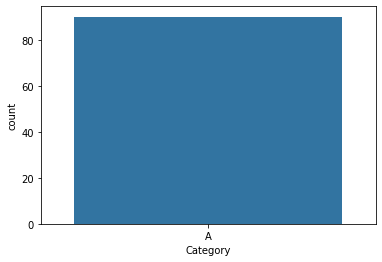

In [39]:
# melihat kolom kategori
sns.countplot(data=data_A1, x='Category')
plt.show()

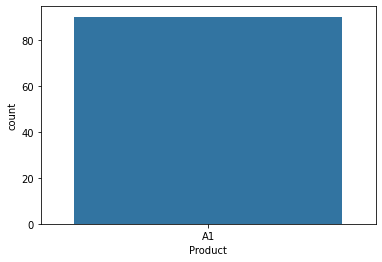

In [40]:
# melihat kolom produk
sns.countplot(data=data_A1, x='Product')
plt.show()

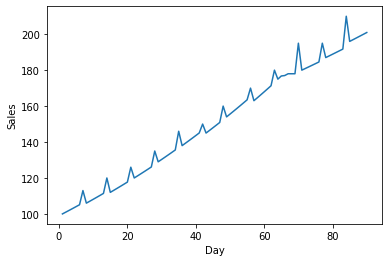

In [44]:
# melihat kolom penjualan

sns.lineplot(data=data_A1, x='Day', y='Sales')
plt.show()

In [ ]:
# Univariate Plots
# 1. continuous
# # - histogram
# # # sns.histplot(data=data, x='', hue='') and hue is groupby or grouping variable
# # - boxplot
# # # sns.boxplot(data=data, x='', hue='')
# # - boxenplot
# # # sns.boxenplot(data=data, x='', hue='') or boxplot with quartile information
# # - rugplot
# # # sns.rugplot(data=data, x='', hue='')
# # - violinplot
# # # sns.violinplot(data=data, x='', hue='')
# # - KDE plot
# # # sns.kdeplot(data=data, x='', shade=True)
# # - strip plot
# # # sns.stripplot(data=data, x='', hue='')
# # - swarm plot
# # # sns.swarmplot(data=data, x='', hue='')
# # - ecdf plot
# # # sns.ecdfplot(data=data, x='pulse', hue='diet')
# 2. categorical
# # - countplot
# # # sns.countplot(data=data_A1, x='Product', hue='alive')
# 3. combining chart
# # # sns.kdeplot(data=data, x='pulse', hue='diet')
# # # sns.rugplot(data=data, x='pulse', hue='diet')

# Bivariate Plots
# 1. continuous
# # - scatterplot
# # # sns.scatterplot(data=data, x='carat', y='price')
# # # or
# # # sns.scatterplot(data=data, x='carat', y='price', marker='+')
# # - histplot which looks like digitized scatterplot 
# # # sns.histplot(data=data, x='carat', y='price')
# # - lmpplot
# # # sns.lmplot(data=data, x='carat', y='price', markers='.', line_kws={'color':'red'}})
# # - regplot
# # - hexplot
# # - pairgrid
# # - KDE plot
# # # sns.kdeplot(data=data, x='carat', y='price', fill=True, cmap='mako_r')
# 2. combining chart
# # kde & hist
# # # sns.kdeplot(data=data, x='carat', y='price', cmap='coolwarm')
# # # sns.histplot(data=data, x='carat', y='price', color='red')
# # jointplot
# # # jointplot: histo & scatter
# # # sns.jointplot(data=data, x='carat', y='price')
# # # jointplot: histo & grid
# # # sns.jointplot(data=data, x='carat', y='table', kind='hex')
# 3. categorical
# # - lineplot
# # # sns.lineplot(data=data, x='year', y='passenger')
# # - barplot
# # # sns.barplot(data=data, x='year', y='passenger')
# # - pointplot
# # # sns.pointplot(data=data, x='year', y='passenger')
# 4. plotting relationship
# # # sns.relplot(data=data, x='carat', y='price', col='cut') and cut means categorical
# facetgrid
# # facet = sns.FacetGrid(data=data, col='smoker', row='sex')
# # facet.map(sns.boxplot, 'total_bill')
# pairplot
# # sns.pairplot(data)
# 5. correlation
# # data=sns.load_dataset('diamonds')
# # sns.heatmap(data.corr())
# # sns.heatmap(data.corr(), annot=True, linewidths=1)
# # sns.heatmap(data.corr()[['price']], annot=True, linewidths=1)

## tutor matplotlib sudah dibuat di notebook lain

### 3.2. Kategori A2

In [45]:
# menampilkan tabel 5 data teratas
data_A2.head()

,Day,Category,Product,Sales
0,1,A,A2,1000.000000
1,2,A,A2,1005.000000
2,3,A,A2,1010.025000
3,4,A,A2,1015.075125
4,5,A,A2,1020.150501


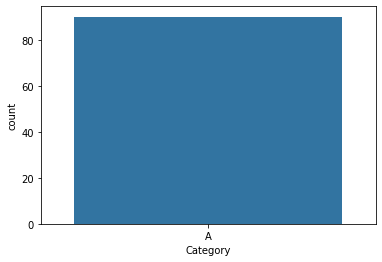

In [46]:
# melihat kolom kategori
sns.countplot(data=data_A2, x='Category')
plt.show()

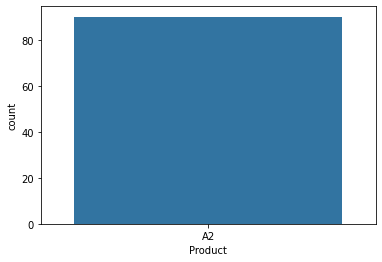

In [47]:
# melihat kolom produk
sns.countplot(data=data_A2, x='Product')
plt.show()

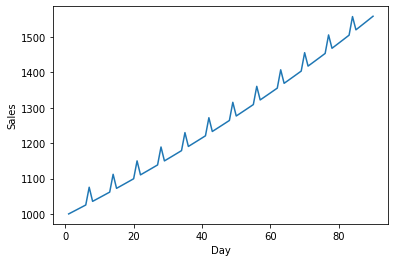

In [48]:
# melihat kolom penjualan
sns.lineplot(data=data_A2, x='Day', y='Sales')
plt.show()

### 3.3. Kategori B1

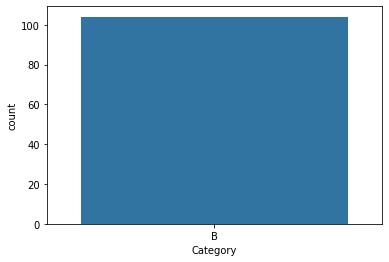

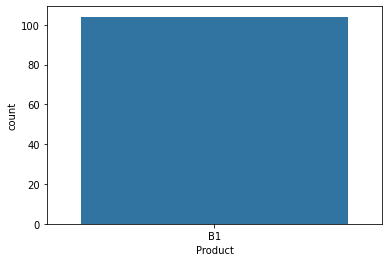

In [52]:
# menampilkan tabel 5 data teratas
data_B1.head()
# melihat kolom kategori
sns.countplot(data=data_B1, x='Category')
plt.show()
# melihat kolom produk
sns.countplot(data=data_B1, x='Product')
plt.show()

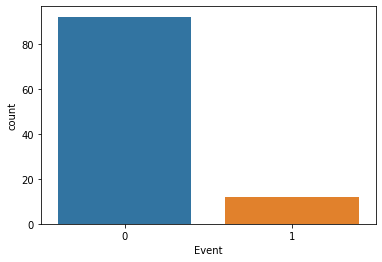

In [53]:
# melihat kolom event
sns.countplot(data=data_B1, x='Event')
plt.show()

In [55]:
# melihat kolom event
data_B1.Event.value_counts()

0    92
1    12
Name: Event, dtype: int64

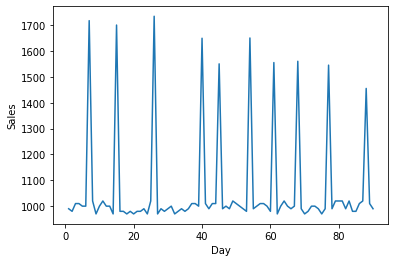

In [49]:
# melihat kolom penjualan
sns.lineplot(data=data_B1, x='Day', y='Sales')
plt.show()

### 3.4. Kategori B2

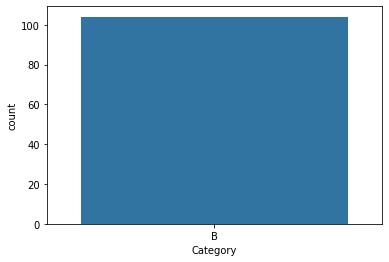

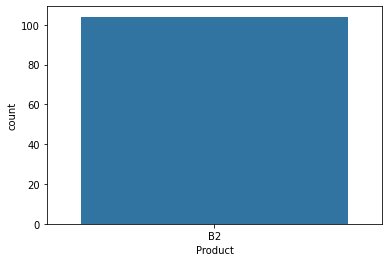

In [51]:
# menampilkan tabel 5 data teratas
data_B2.head()
# melihat kolom kategori
sns.countplot(data=data_B2, x='Category')
plt.show()
# melihat kolom produk
sns.countplot(data=data_B2, x='Product')
plt.show()

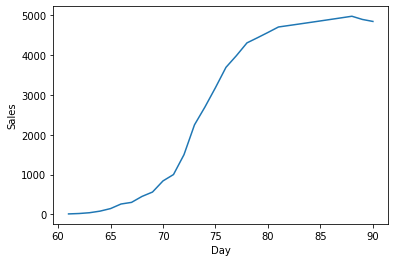

In [50]:
# melihat kolom penjualan
sns.lineplot(data=data_B2, x='Day', y='Sales')
plt.show()

Hasil pengamatan:
- Sales pada data A1 mengalami tren naik dan seasonal setiap kelipatan beberapa hari.
- Sales pada data A2 mengalami tren naik dan seasonal setiap kelipatan beberapa hari.
- Sales pada data B1 menunjukkan data stationary namun ada fluktuasi di hari tertentu kemungkinan di hari adanya event.
- Sales pada data B2 mengalami tren naik.

## 4. Data Preprocessing

### 4.1. Get Data for Model Inference

### 4.2. Splitting between X & y

### 4.3. Handling Outliers

### 4.4 Handling Missing Values

### 4.5. Feature Selection

### 4.6. Split Between Numerical Columns and Categorical Columns

### 4.7. Feature Scaling and Encoding

## 5. Model Definition

## 6. Model Training

## 7. Model Evaluation

### 7.1. Cross Val

### 7.2. Hyperparameter Tuning

## 8. Model Inference

## 9. Model Saving

## 10. Model Testing

# Conclusion/Overall Analysis